In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())



import warnings

warnings.filterwarnings("ignore")

          Date        Open        High         Low       Close   Adj Close  \
246 2023-07-13  121.540001  125.334999  121.059998  124.830002  124.830002   
247 2023-07-14  125.129997  127.089996  124.900002  125.699997  125.699997   
248 2023-07-17  126.059998  127.279999  124.500000  125.059998  125.059998   
249 2023-07-18  124.904999  124.989998  123.300003  124.080002  124.080002   
250 2023-07-19  124.790001  125.470001  122.470001  122.779999  122.779999   

       Volume  
246  31535900  
247  20482800  
248  20675300  
249  21071200  
250  22239400  


In [ ]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-07-20  114.699997
1 2022-07-21  115.040001
2 2022-07-22  108.360001
3 2022-07-25  108.209999
4 2022-07-26  105.440002


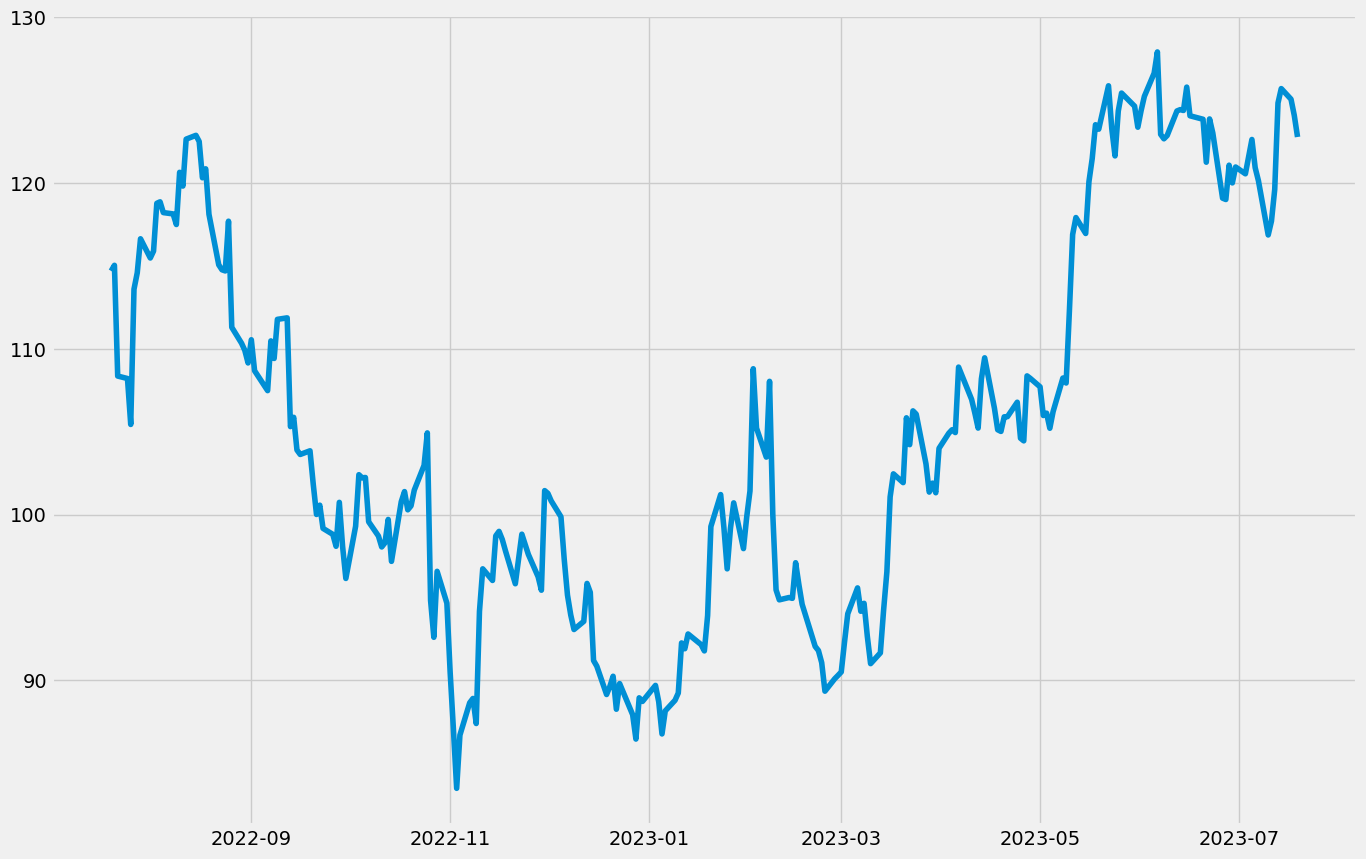

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

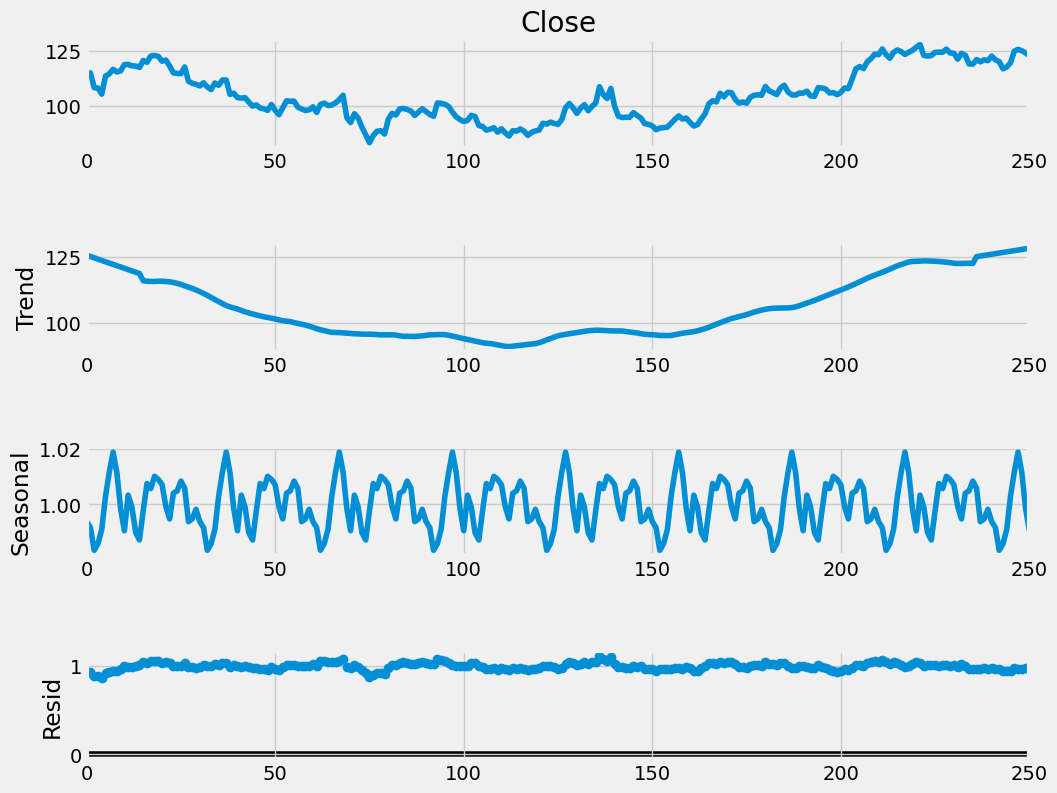

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = decomp_mul = seasonal_decompose(data['Close'], model='multiplicative', extrapolate_trend='freq', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(12,9)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

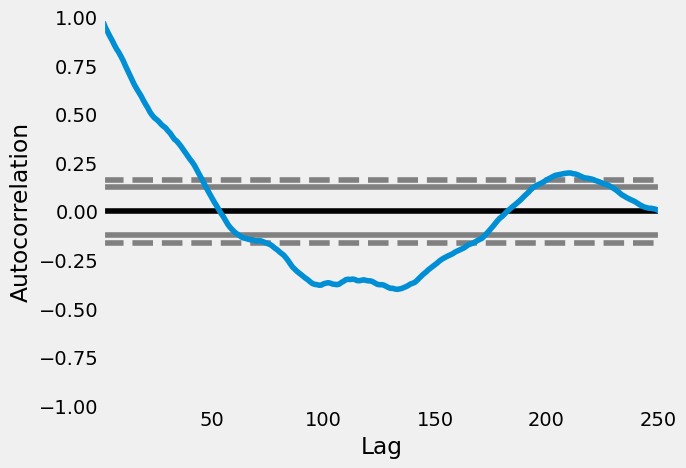

In [ ]:
pd.plotting.autocorrelation_plot(data["Close"])

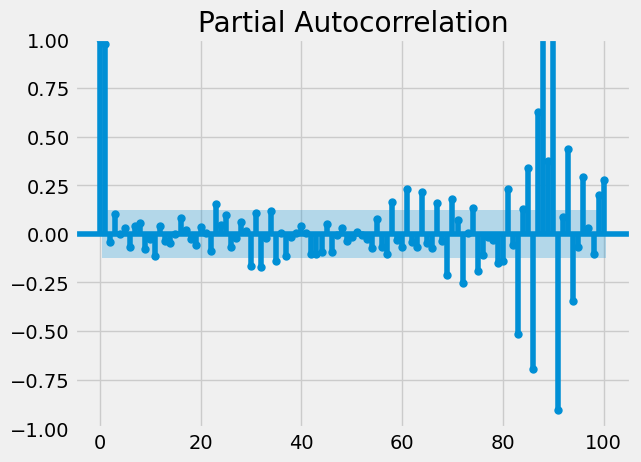

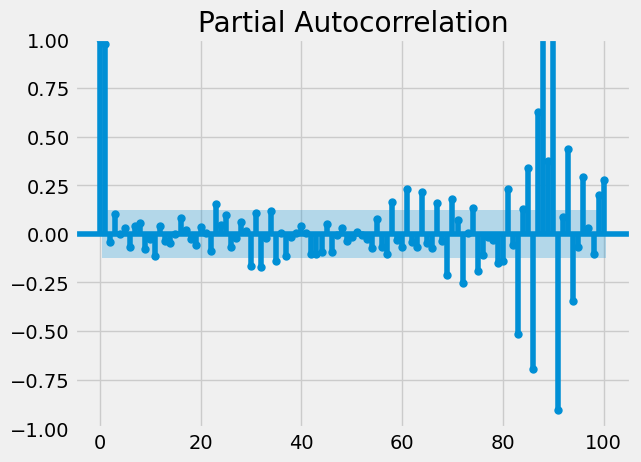

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [ ]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA




import statsmodels.api as smapi

model = smapi.tsa.arima.ARIMA(data['Close'], order=(1,1,2))

result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -569.000
Date:                Thu, 20 Jul 2023   AIC                           1146.001
Time:                        05:44:11   BIC                           1160.087
Sample:                             0   HQIC                          1151.670
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1487      0.589      0.253      0.801      -1.005       1.303
ma.L1         -0.1375      0.581     -0.237      0.813      -1.276       1.001
ma.L2         -0.0982      0.070     -1.396      0.1

In [ ]:
predictions = result.predict()
print(predictions)

0        0.000000
1      114.700004
2      115.043827
3      108.243752
4      108.842639
          ...    
246    119.610529
247    124.733752
248    125.183838
249    124.886934
250    124.057381
Name: predicted_mean, Length: 251, dtype: float64


In [ ]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -553.280
Date:                            Thu, 20 Jul 2023   AIC                           1136.560
Time:                                    05:45:03   BIC                           1188.644
Sample:                                         0   HQIC                          1157.550
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0017      0.288     -0.006      0.995      -0.567       0.564
ar.L2         -0.8605      0.243   

In [ ]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    124.167778
252    126.249162
253    125.431072
254    125.172030
255    125.246434
256    125.779518
257    126.331684
258    125.846967
259    126.616365
260    126.164856
261    126.261884
Name: predicted_mean, dtype: float64


<Axes: >

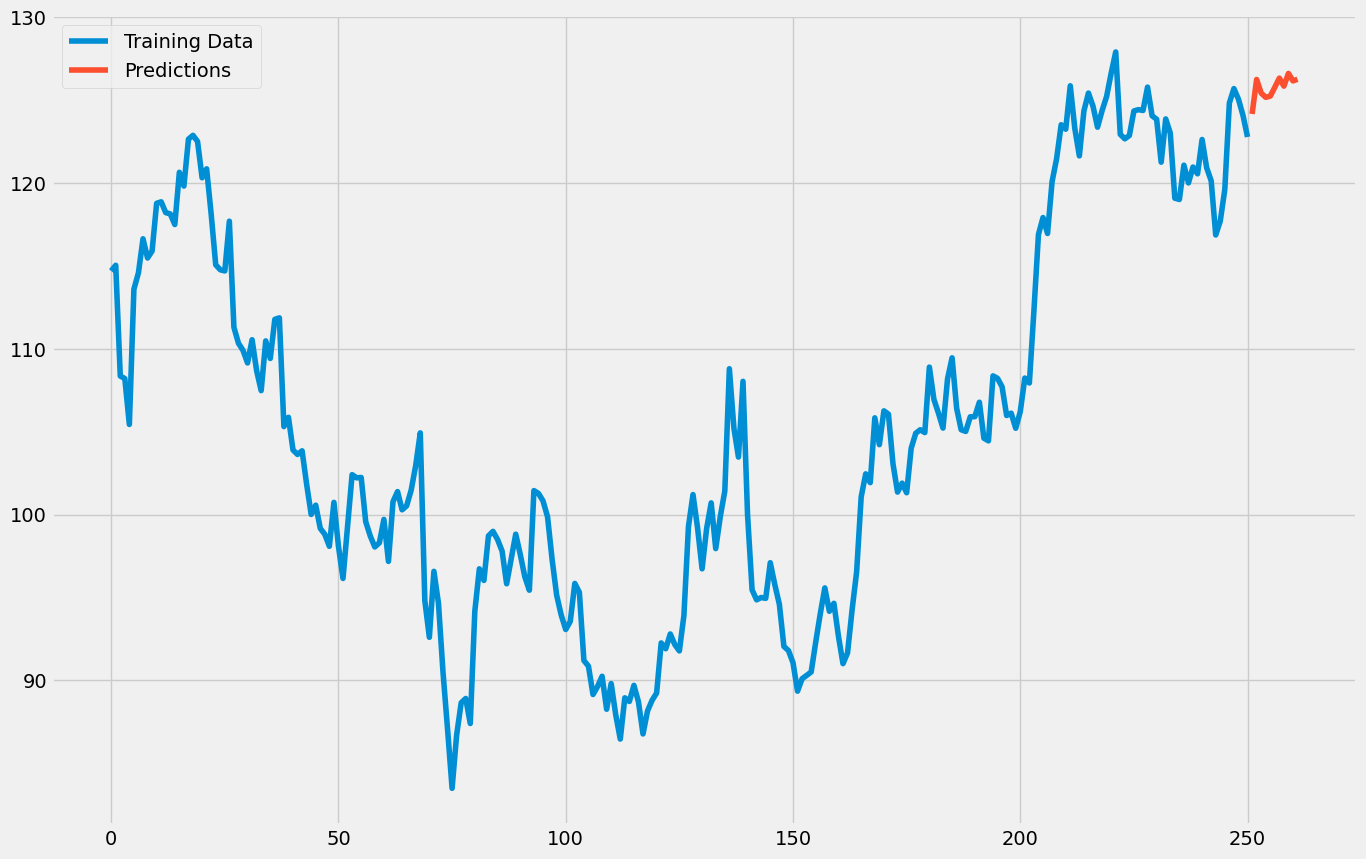

In [ ]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")